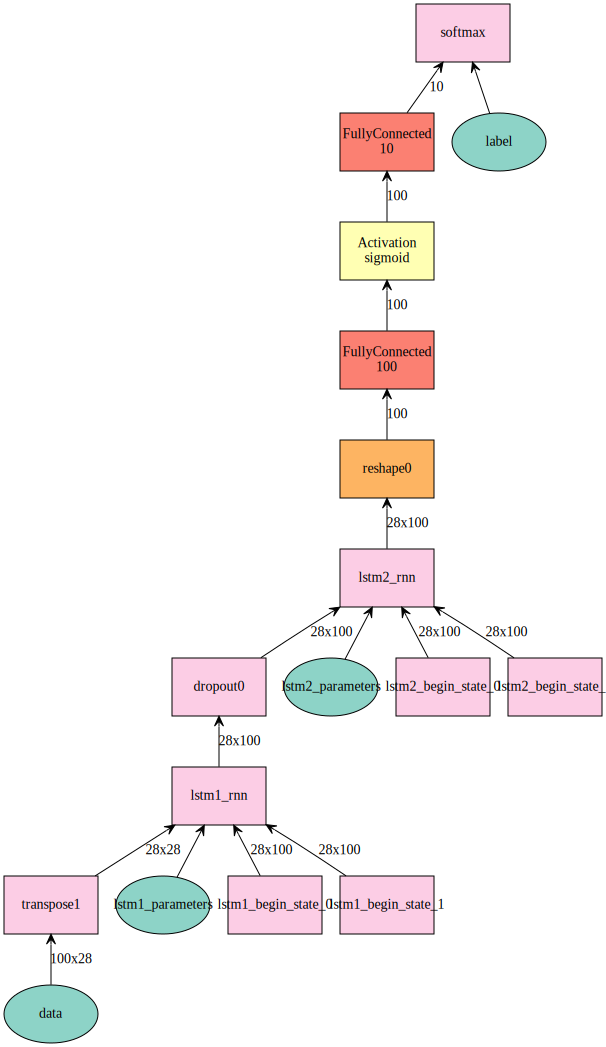

In [2]:
import mxnet as mx

time_step=28
hidden_unit_number1 = 100
hidden_unit_number2 = 100
fc_number=100
class_number=10

data = mx.sym.Variable('data')
label = mx.sym.Variable('label')
data = mx.sym.transpose(data, axes=(1, 0, 2))  # (time,batch,column)

lstm1 = mx.rnn.FusedRNNCell(num_hidden=hidden_unit_number1, mode="lstm", prefix="lstm1_",get_next_state=True)
lstm2 = mx.rnn.FusedRNNCell(num_hidden=hidden_unit_number2, mode="lstm", prefix="lstm2_",get_next_state=True)

#if you see the unroll function
layer1, state1= lstm1.unroll(length=time_step, inputs=data, merge_outputs=True, layout='TNC')
layer1 = mx.sym.Dropout(layer1, p=0.3)
layer2, state2 = lstm2.unroll(length=time_step, inputs=layer1, merge_outputs=True,layout="TNC")
rnn_output= mx.sym.Reshape(state2[-1], shape=(-1,hidden_unit_number1))

'''FullyConnected Layer'''
affine1 = mx.sym.FullyConnected(data=rnn_output, num_hidden=fc_number, name='affine1')
act1 = mx.sym.Activation(data=affine1, act_type='sigmoid', name='sigmoid1')
affine2 = mx.sym.FullyConnected(data=act1, num_hidden=class_number, name = 'affine2')
output = mx.sym.SoftmaxOutput(data=affine2, label=label, name='softmax')


# We visualize the network structure with output size (the batch_size is ignored.)
shape = {"data": (time_step,100,28)}
mx.viz.plot_network(symbol=output,shape=shape)#The diagram can be found on the Jupiter notebook.